In [1]:
import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [3]:
### Run this cell
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


In [10]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [27]:
from torch import nn
import torch.nn.functional as F

In [74]:
class Model(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
    
    def forward(self,x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.log_softmax(x,dim=1)
        return x

In [75]:
images.shape

torch.Size([64, 1, 28, 28])

In [76]:
images_ = images.view(images.shape[0],-1)

In [77]:
images_.shape

torch.Size([64, 784])

## Passing full batch

In [78]:
model = Model()

In [79]:
criterion = nn.NLLLoss()

In [80]:
from torch import optim

In [81]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [82]:
epochs = 400
losses = []

for epoch in range(epochs):
    output = model(images_)
    loss = criterion(output, labels)
    
    losses.append(loss.detach().numpy())
    if epoch%10==0:
        print(f'Epoch {epoch} and loss is {loss:.8f}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is 2.31729865
Epoch 10 and loss is 2.27654052
Epoch 20 and loss is 2.24699807
Epoch 30 and loss is 2.21980715
Epoch 40 and loss is 2.19451737
Epoch 50 and loss is 2.16862321
Epoch 60 and loss is 2.14025450
Epoch 70 and loss is 2.10932374
Epoch 80 and loss is 2.07574677
Epoch 90 and loss is 2.03911352
Epoch 100 and loss is 1.99864542
Epoch 110 and loss is 1.95471799
Epoch 120 and loss is 1.90569639
Epoch 130 and loss is 1.85194719
Epoch 140 and loss is 1.79311764
Epoch 150 and loss is 1.72998452
Epoch 160 and loss is 1.66297436
Epoch 170 and loss is 1.59214842
Epoch 180 and loss is 1.51821446
Epoch 190 and loss is 1.44155467
Epoch 200 and loss is 1.36348641
Epoch 210 and loss is 1.28449225
Epoch 220 and loss is 1.20608473
Epoch 230 and loss is 1.12996495
Epoch 240 and loss is 1.05640447
Epoch 250 and loss is 0.98574477
Epoch 260 and loss is 0.91827369
Epoch 270 and loss is 0.85430282
Epoch 280 and loss is 0.79451877
Epoch 290 and loss is 0.73831379
Epoch 300 and loss is

In [83]:
model

Model(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [85]:
with torch.

Parameter containing:
tensor([[ 0.0074, -0.0189, -0.0347,  ...,  0.0338,  0.0054,  0.0105],
        [ 0.0181, -0.0335,  0.0202,  ..., -0.0144,  0.0083, -0.0073],
        [-0.0032, -0.0295, -0.0303,  ..., -0.0257, -0.0044,  0.0030],
        ...,
        [ 0.0019, -0.0116,  0.0071,  ...,  0.0326, -0.0353,  0.0155],
        [ 0.0129, -0.0233,  0.0191,  ..., -0.0111,  0.0096,  0.0021],
        [-0.0381, -0.0369, -0.0088,  ..., -0.0238, -0.0281,  0.0077]],
       requires_grad=True)

In [90]:
import matplotlib.pyplot as plt

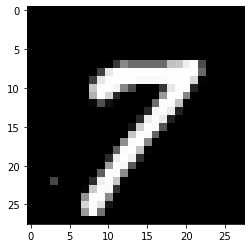

In [91]:
plt.imshow(images[0].reshape(28,28),cmap='Greys_r')

In [96]:
with torch.no_grad():
    ps = model(images_[0].reshape(-1,784))

In [97]:
ps.argmax()

tensor(7)

## Passing batch of size 2

In [103]:
with torch.no_grad():
    ps = model(images_[:2].reshape(-1,784))

In [104]:
images_[:2].shape

torch.Size([2, 784])

In [105]:
ps.shape

torch.Size([2, 10])

In [107]:
ps.argmax(dim=1)

tensor([7, 1])

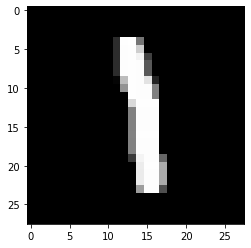

In [108]:
plt.imshow(images[1].reshape(28,28),cmap='Greys_r')